<h1>Logistic regression</h1>
<h3>by:Moamen Nssar</h3>


Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
In Logistic regression, instead of fitting a regression line like linear regression, we fit a logistic function, which predicts two maximum values (0 or 1).

Logistic Function output is any value between 0,1 so to get only 0,1 values we set a threshold value.
If output equal or more than threshold value then it 
considered as 1, if it less than threshold value it considered as 0.


<h4>Logistic Function (Sigmoid Function):</h4>

The sigmoid function is a mathematical function which has a characteristic S-shaped curve used to map the predicted values to values within a range of 0 and 1.<br>
The logistic sigmoid function is defined as follows:

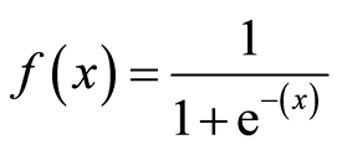



The following graph shows the characteristic S-shape which gave sigmoid functions their name (from the Greek letter sigma).
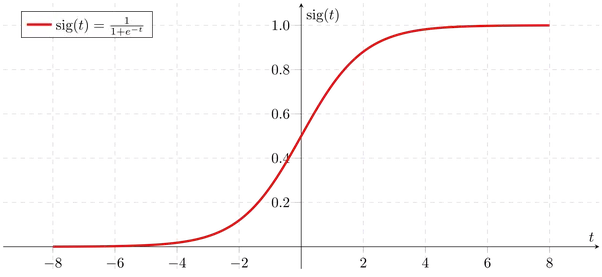

<h3>Cost Function in Logistic Regression</h3>

In linear regression, we use the Mean squared error which was the difference between y_predicted and y_actual and this is derived from the maximum likelihood estimator. The graph of the cost function in linear regression is convex graph where local minima is the same as global minima.<br>

In logistic regression Yi is a non-linear function (Ŷ=1​/1+ e-z). If we use this in the above MSE equation then it will give a non-convex graph with many local minima. notice the following image to see the difference.

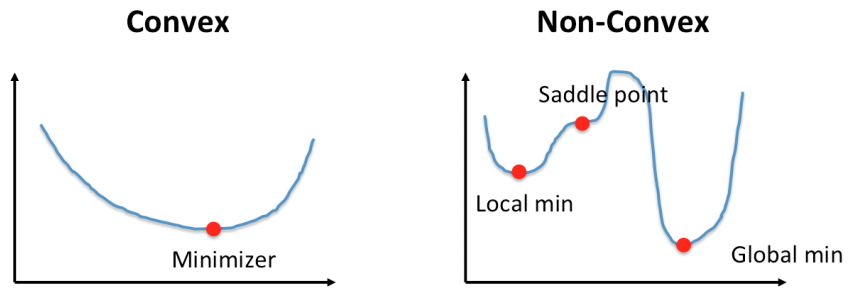

<h3>Cost function</h3>

The problem here is that this cost function will give results with local minima, which is a big problem because then we’ll miss out on our global minima and our error will increase.

In order to solve this problem, we derive a different cost function for logistic regression called log loss which is also derived from the maximum likelihood estimation method.
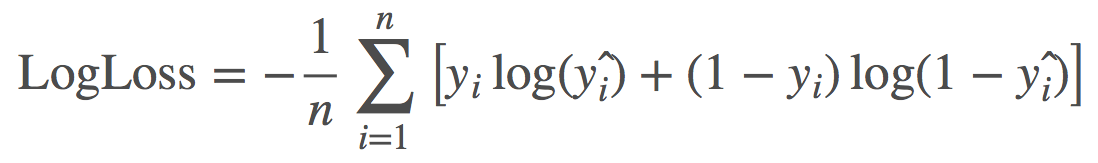

<h3>Minimizing the Cost with Gradient Descent</h3>

We have successfully calculated our Cost Function. But we need to minimize the loss to make a good predicting algorithm. To do that,we have the Gradient Descent Algorithm.Gradient descent changes the value of our weights in such a way that it always converges to minimum point or we can also say that, it aims at finding the optimal weights which minimize the loss function of our model. It is an iterative method that finds the minimum of a function by figuring out the slope at a random point and then moving in the opposite direction.

The following figure shows an overview of Gradient Descent process

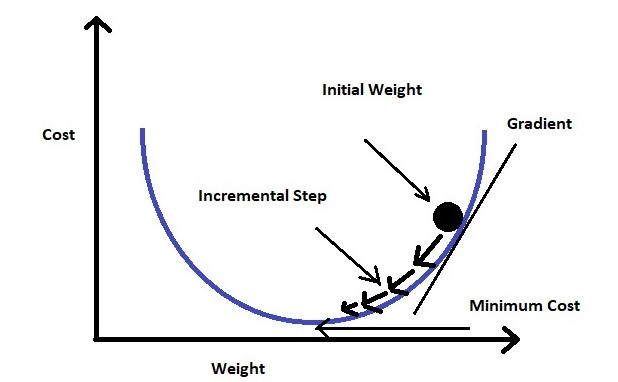


At first gradient descent takes a random value of our parameters,then the gradient descent algorithm finds the slope of the loss function at that particular point and then in the next iteration, it moves in the opposite direction to reach the minima. Since we have a convex graph now we don’t need to worry about local minima. A convex curve will always have only 1 minima.

Gradient descent formula:

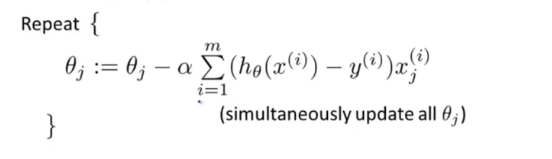

## building LogisticRegression model by using sklearn 

In [13]:
#import needed library 
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
#load breast cancer data
BreastData=load_breast_cancer()

#X Data
X = BreastData.data

#y Data
y = BreastData.target


In [6]:
#check values of y

print(np.unique(y))

[0 1]


In [7]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

<h3>Logistic Regression Parameters</h3>

* C : float(default=1.0), Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

* max_iter:Maximum number of iterations taken for the solvers to converge. it's useful only for the newton-cg and lbfgs solvers Algorithm to use in the optimization problem.

* tol: float, tol is the tolerance for the stopping criteria. This tells scikit to stop searching for a minimum (or maximum) once tolerance is achieved.

In [18]:
#create the model and setting parameters 
LogisticRegressionModel = LogisticRegression(max_iter=3000,C=1,tol=0.00001,random_state=33)

#fitting the data
LogisticRegressionModel.fit(X_train, y_train)

#show the number of iterations happend to reach global minima
print('No of iterations = ' , LogisticRegressionModel.n_iter_)
#show classes 
print('Classes = ' , LogisticRegressionModel.classes_)

 

No of iterations =  [2905]
Classes =  [0 1]


In [11]:
#predict class using testing data
y_pred=LogisticRegressionModel.predict(X_test)
#get score of trainig 
score = LogisticRegressionModel.score(X, y)
print('score = ' , score)

score =  0.9595782073813708


In [14]:
#get accuracy of testing data
test_accuracy=accuracy_score(y_test,y_pred)
test_accuracy

0.9824561403508771

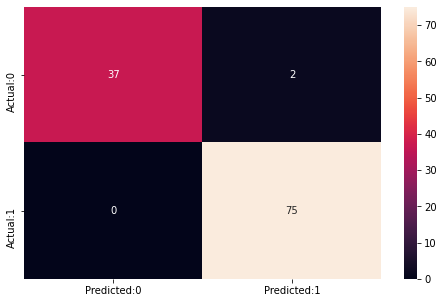

In [12]:
# make the confusion matrix for testing data 
cm=confusion_matrix(y_test,y_pred)

#show confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True)